In [4]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


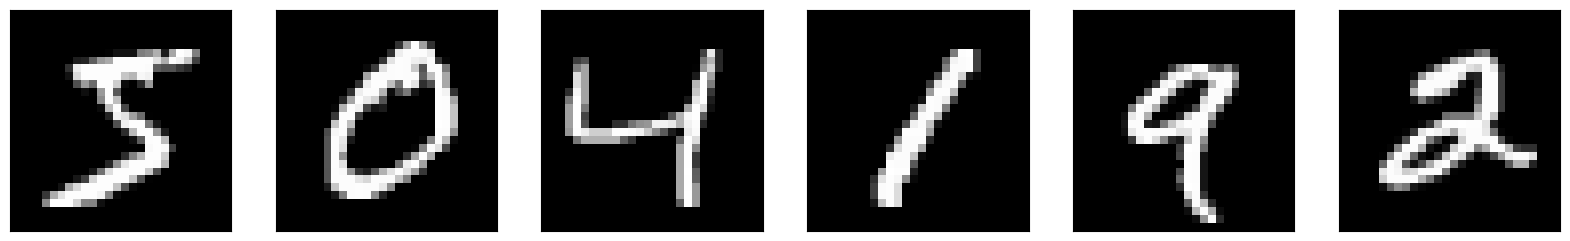

In [5]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

fig = plt.figure(figsize=(20,20))
for i in range(6):
  ax = fig.add_subplot(1,6,i+1, xticks=[], yticks=[])
  ax.imshow(X_train[i], cmap='gray')


In [6]:
X_trian = X_train/255
X_test = X_test/255

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
from tensorflow.keras.utils import to_categorical

num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [9]:
# input image dimensions 28x28 pixel images.
img_rows, img_cols = 28, 28

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

print('input_shape: ', input_shape)
print('x_train shape:', X_train.shape)

input_shape:  (28, 28, 1)
x_train shape: (60000, 28, 28, 1)


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout, GlobalAveragePooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), padding='same', activation='relu', input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size = (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │         200,768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 220,234 (860.29 KB)

 Trainable params: 220,234 (860.29 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'] )

In [12]:
from tensorflow.keras.callbacks import ModelCheckpoint

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.keras', verbose=1,
                               save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=64, epochs=10,
          validation_data=(X_test, y_test), callbacks=[checkpointer],
          verbose=2, shuffle=True)

Epoch 1/10

Epoch 1: val_loss improved from inf to 2.30084, saving model to model.weights.best.keras
938/938 - 9s - 9ms/step - accuracy: 0.9434 - loss: 0.4178 - val_accuracy: 0.1035 - val_loss: 2.3008
Epoch 2/10

Epoch 2: val_loss did not improve from 2.30084
938/938 - 5s - 6ms/step - accuracy: 0.9829 - loss: 0.0622 - val_accuracy: 0.0974 - val_loss: 2.3026
Epoch 3/10

Epoch 3: val_loss did not improve from 2.30084
938/938 - 3s - 4ms/step - accuracy: 0.9875 - loss: 0.0432 - val_accuracy: 0.1010 - val_loss: 2.3028
Epoch 4/10

Epoch 4: val_loss did not improve from 2.30084
938/938 - 3s - 3ms/step - accuracy: 0.9903 - loss: 0.0360 - val_accuracy: 0.0974 - val_loss: 2.3026
Epoch 5/10

Epoch 5: val_loss did not improve from 2.30084
938/938 - 3s - 3ms/step - accuracy: 0.9924 - loss: 0.0299 - val_accuracy: 0.1010 - val_loss: 2.3031
Epoch 6/10

Epoch 6: val_loss did not improve from 2.30084
938/938 - 5s - 6ms/step - accuracy: 0.9936 - loss: 0.0257 - val_accuracy: 0.0974 - val_loss: 2.3031
Epoc